In [15]:
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
# (X_train, y_train), (X_test, y_test) = mnist.load_data()

# Data Preprocssing

In [16]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
# Preprocess the data
print(X_train.shape)  # Output: (60000, 28, 28)
print(y_train.shape)  # Output: (60000,)

# Normalise the data 
X_train = X_train/255.0
X_test = X_test/255.0

# Reshape the input data to have a single channel
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print("\nAfter reshaping:")
print(X_train.shape)  # Output: (60000, 28, 28, 1)
print(X_test.shape)   # Output: (10000, 28, 28, 1)

(60000, 28, 28)
(60000,)

After reshaping:
(60000, 28, 28, 1)
(10000, 28, 28, 1)


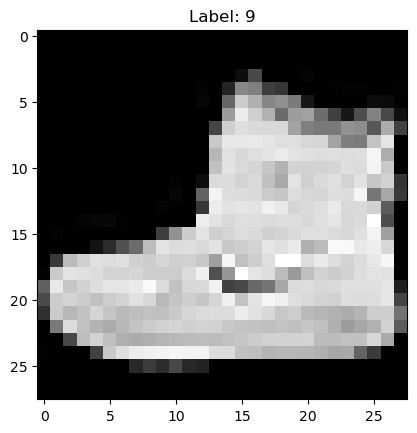

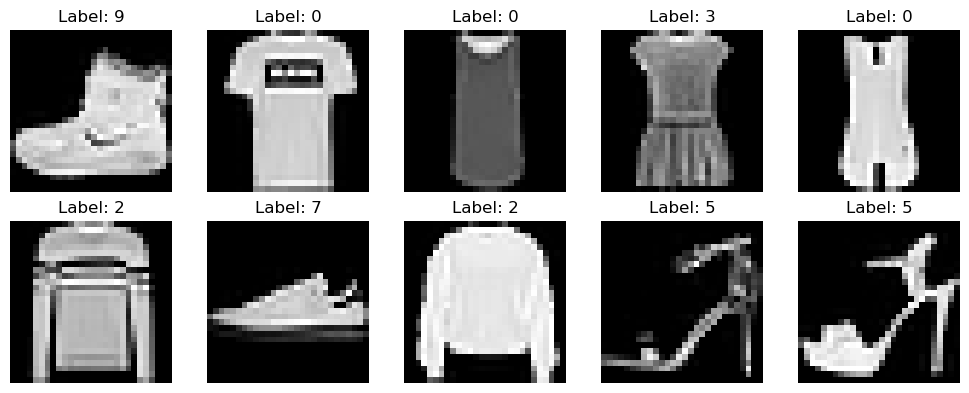

In [17]:
import matplotlib.pyplot as plt

# Display a single image
plt.imshow(X_train[0], cmap='gray')
plt.title('Label: ' + str(y_train[0]))
plt.show()

# Display multiple images in a grid
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title('Label: ' + str(y_train[i]))
    ax.axis('off')
plt.tight_layout()
plt.show()

# Your task is to get the test accuracy above 98%

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [ ]:


# Define the CNN model
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # Convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))  # Second convolutional layer
model.add(MaxPooling2D((2, 2)))  # Max pooling layer
model.add(Conv2D(254, (3, 3), activation='relu'))  # Third convolutional layer
model.add(Dropout(0.25))  # Dropout layer to reduce overfitting
model.add(MaxPooling2D((2, 2)))  # Second max pooling layer
model.add(Flatten())  # Flatten the output for the dense layer
model.add(Dense(10, activation='softmax'))  # Dense layer with 10 outputs (for digits 0-9)

# Compile the model
model.compile(optimizer='adam',  # Using the Adam optimizer
              loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])  # Evaluation metric
# model.compile(optimizer='SGD',  # Using the Adam optimizer
#               loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
#               metrics=['accuracy'])  # Evaluation metric



# # Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=10)  # Train for 10 epochs, breaking all datasets into 15 batches
# print()

# # Evaluate the model
# test_loss, test_acc = model.evaluate(X_test, y_test)
# print('\nTest accuracy:', test_acc)

In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 254)    │       292,862 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 254)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6350)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        63,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 430,868 (1.64 MB)

 Trainable params: 430,868 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
from keras.callbacks import ModelCheckpoint

# This checkpoint object will store the model parameters in the file "weights.keras"
checkpoint = ModelCheckpoint("weights.keras", monitor= "val_loss", save_best_only=True)

# Store in a list to be used during training
callbacks_list = [checkpoint]
# Fit the model on a training set, using the checkpoint
# callback
training = model.fit(X_train, y_train, validation_split = 0.2, epochs=5, callbacks= callbacks_list)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 61s 41ms/step - accuracy: 0.7914 - loss: 0.5695 - val_accuracy: 0.8936 - val_loss: 0.3001
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 64s 43ms/step - accuracy: 0.9006 - loss: 0.2699 - val_accuracy: 0.9025 - val_loss: 0.2679
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 72s 48ms/step - accuracy: 0.9230 - loss: 0.2095 - val_accuracy: 0.9137 - val_loss: 0.2426
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.9361 - loss: 0.1745 - val_accuracy: 0.9204 - val_loss: 0.2239
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 53ms/step - accuracy: 0.9496 - loss: 0.1425 - val_accuracy: 0.9186 - val_loss: 0.2396


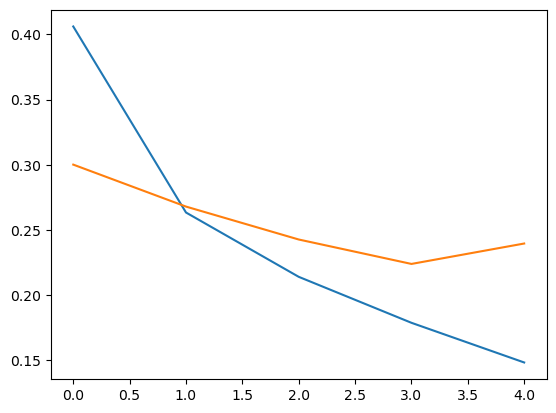

In [41]:
# training = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)  # Train for 10 epochs, breaking all datasets into 10 batches

plt.plot(training.history['loss'], label='loss')
plt.plot(training.history['val_loss'], label='val_loss')
plt.show()

In [42]:
model.evaluate(X_test, y_test, batch_size=10)  # Evaluate the model on the test set with a batch size of 10

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9134 - loss: 0.2511


[0.24665622413158417, 0.9146000146865845]

In [39]:
import numpy as np

model.load_weights("weights.keras")  # Load the best weights from the checkpoint
# y_pred = model.predict_classes(X_test)
# y_pred
predictions = model.predict(X_test[15:20])
predicted_classes = np.argmax(predictions, axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [40]:
print(predicted_classes)
print(y_test[15:20])

[1 2 4 8 0]
[1 2 4 8 0]


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

# Define the CNN model
model = Sequential()
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # Convolutional layer
model.add(MaxPooling2D((2, 2)))  # Max pooling layer
model.add(Conv2D(254, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Flatten())  # Flatten the output for the dense layer
model.add(Dense(10, activation='softmax'))  # Dense layer with 10 outputs (for digits 0-9)

# Compile the model
model.compile(optimizer='adam',  # Using the Adam optimizer
              loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])  # Evaluation metric
# model.compile(optimizer='SGD',  # Using the Adam optimizer
#               loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
#               metrics=['accuracy'])  # Evaluation metric

# Reshape the input data to have a single channel
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Train the model
model.fit(X_train, y_train, epochs=10)  # Train for 10 epochs, breaking all datasets into 10 batches

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# For your assingment: 1 suggestion is to use gridsearch to help you manually tune the parameters.

In [1]:
import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'elephant.jpg'
img = keras.utils.load_img(img_path, target_size=(224, 224))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

KeyboardInterrupt: 

In [ ]:
model.summary()

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam, SGD

# Define a function that creates your model
def create_model(optimizer='adam', learning_rate=0.001):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    if optimizer == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'SGD':
        optimizer = SGD(learning_rate=learning_rate)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create a KerasClassifier wrapper for use with GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=32, verbose=0)

# Define the parameter grid
param_grid = {
    'optimizer': ['adam', 'SGD'],
    'learning_rate': [0.001, 0.01, 0.1],
    'epochs': [5, 10, 15]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)

# Reshape data for the model
X_train_reshaped = X_train.reshape(-1, 28, 28, 1)

# Fit the grid search to your data
grid_search_result = grid_search.fit(X_train_reshaped, y_train)

# Print the best parameters and best score
print("Best parameters: ", grid_search_result.best_params_)
print("Best accuracy: ", grid_search_result.best_score_)

In [ ]:
from scikeras.wrappers import KerasClassifier